## `Paragraph text recognizer`

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

import sys
sys.path.append(os.path.abspath('../..'))

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K

from text_recognizer.models.line_detector_model import LineDetectorModel
from text_recognizer.datasets.iam_paragraphs_dataset import IamParagraphsDataset
from text_recognizer.paragraph_text_recognizer import ParagraphTextRecognizer
import text_recognizer.util as util

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
def plot(image):
    plt.figure(figsize=(15, 15))
    plt.imshow(image, cmap='gray', vmin=0, vmax=max(1, image.max()))
    plt.colorbar()

def hplot(x, y, y_pred=None, title=''):
    fig = plt.figure(figsize=(16, 9))
    fig.suptitle(title)
    
    ax1 = fig.add_subplot(131)
    ax1.imshow(x, cmap='gray', vmin=0, vmax=max(1, x.max()))
    
    ax2 = fig.add_subplot(132)
    ax2.imshow(y, cmap='gray', vmin=0, vmax=max(1, y.max()))
    
    if y_pred is not None:
        ax3 = fig.add_subplot(133)
        ax3.imshow(y_pred, cmap='gray', vmin=0, vmax=max(1, y_pred.max()))

In [3]:
K.clear_session()
text_recog = ParagraphTextRecognizer()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None)   0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, None, None, 1 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 1 800         lambda[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 1 12560       conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image (InputLayer)              (None, 28, 952)      0                                            
__________________________________________________________________________________________________
reshape (Reshape)               (None, 28, 952, 1)   0           image[0][0]                      
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 189, 28, 12,  0           reshape[0][0]                    
__________________________________________________________________________________________________
time_distributed (TimeDistribut (None, 189, 128)     412160      lambda_1[0][0]                   
__________________________________________________________________________________________________
lstm (LSTM

[(93, 913), (82, 902), (82, 886), (65, 886), (76, 935), (87, 946), (82, 946), (71, 968), (71, 935), (82, 996), (87, 213), (54, 153), (65, 279), (27, 38), (27, 153)]
Num line regions: 15


'tgk to wo ouoer some be.ing saorts a Ieye muogoit f Lecmer tr # are beisb to tum sdion the Foat-ersete msoktin. M t.s Lnc wtl ben tht ss Lakimr r t# opand the caenment Bitl whik bngtt f rmw it endterae, toy shucd wt now porrt ftwmrd mmineers. t bakone ht the thame of Lomdts sthintd te shalbtead and tht Latomr sthotd nt tohe any steps wit wumd oper to ioup yp " an ond edhed ibe  thesh BBeck ek d frsate'

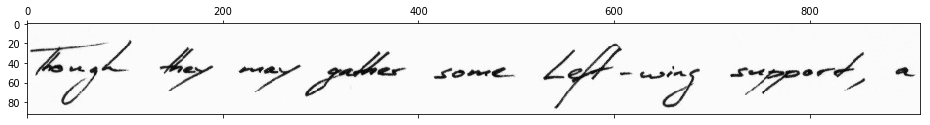

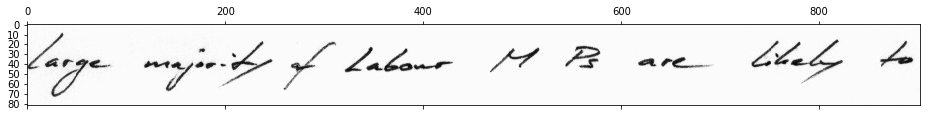

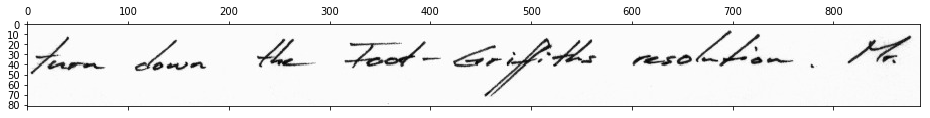

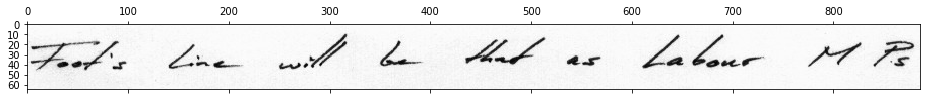

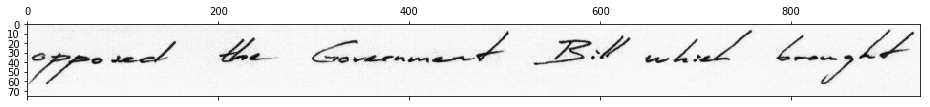

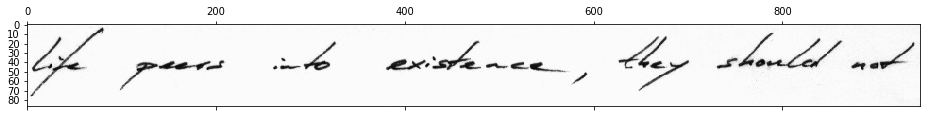

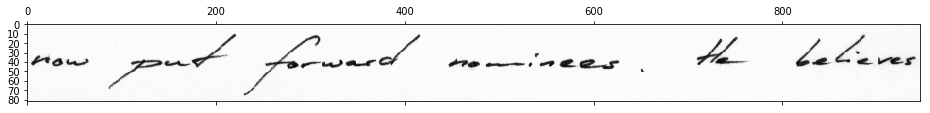

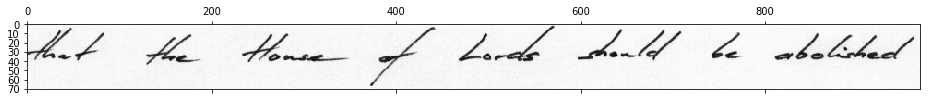

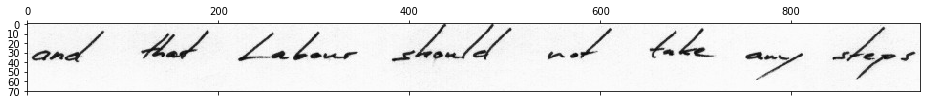

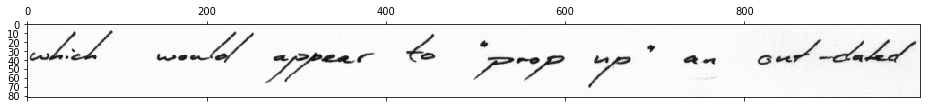

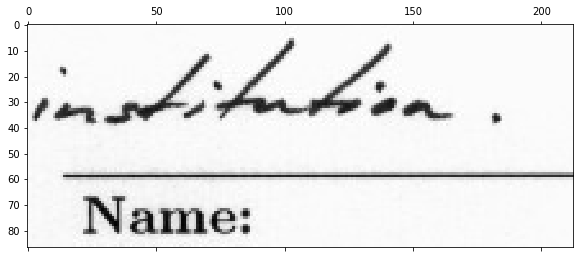

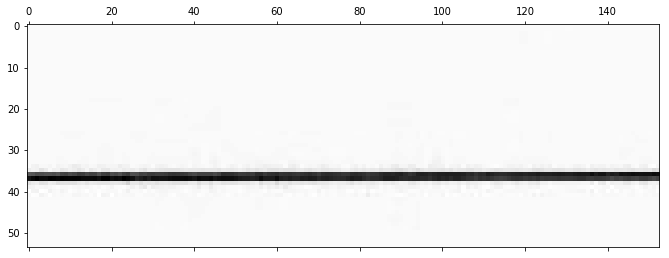

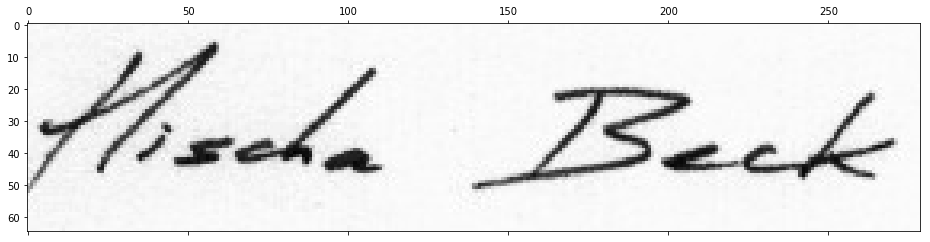

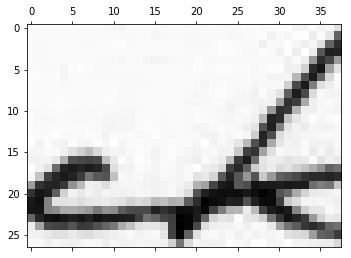

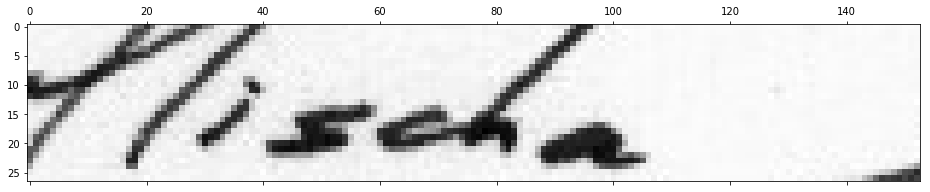

In [10]:
image_basenames = ['a01-000u.jpg', 'a01-000x.jpg', 'a01-003.jpg', 'a01-003u.jpg']

image_or_filename = f'../../data/raw/iam/iamdb/forms/{image_basenames[2]}'

full_image = util.read_image(image_or_filename, grayscale=True)
text_offset = 370

roi_image = full_image[text_offset:,:]
string, crops = text_recog.predict(roi_image)
print('Num line regions:', len(crops))
for crop in crops:
    plt.matshow(crop, cmap='gray')
string

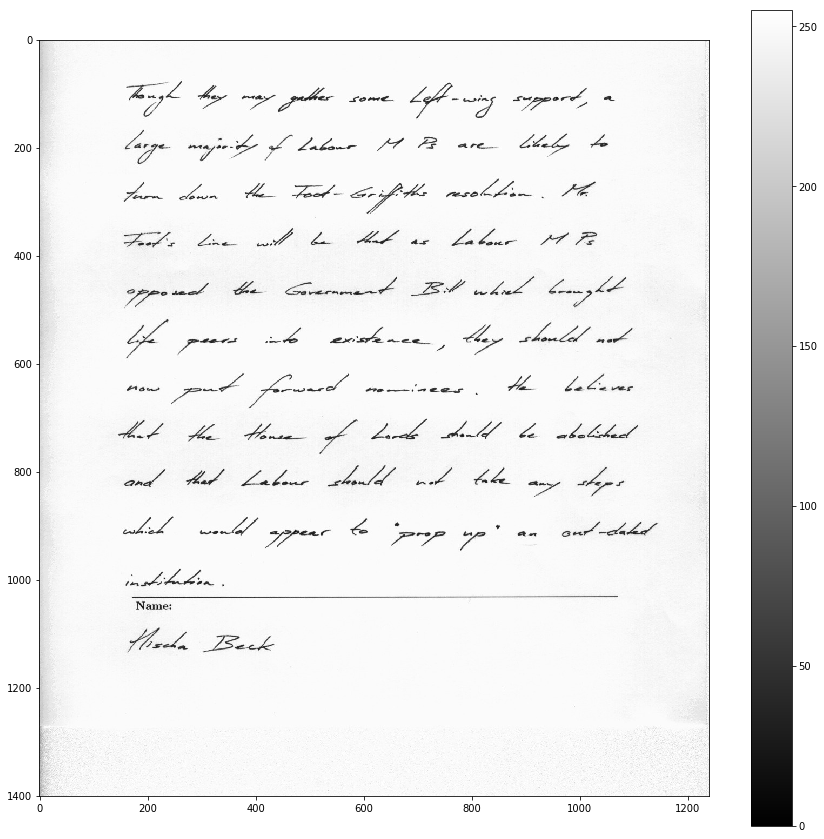

In [11]:
plot(roi_image)

## View line segmentation

In [12]:
image, scale_down_factor = text_recog._prepare_image_for_line_detector_model(roi_image)
line_segmentation = text_recog.line_detector_model.predict_on_image(image)

In [13]:
roi_image.shape, image.shape, scale_down_factor, line_segmentation.shape

((1401, 1240), (256, 227), 5.47265625, (256, 227, 3))

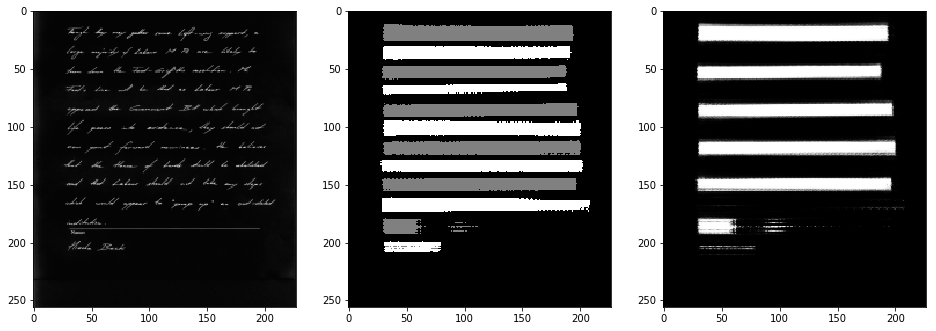

In [14]:
hplot(image, np.argmax(line_segmentation, axis=-1), line_segmentation[:,:,1])

### Channels of line segmentation

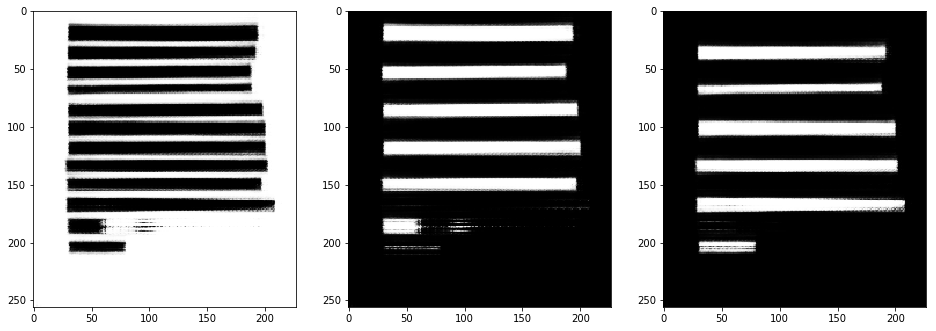

In [15]:
hplot(line_segmentation[:,:,0], line_segmentation[:,:,1], line_segmentation[:,:,2])